# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

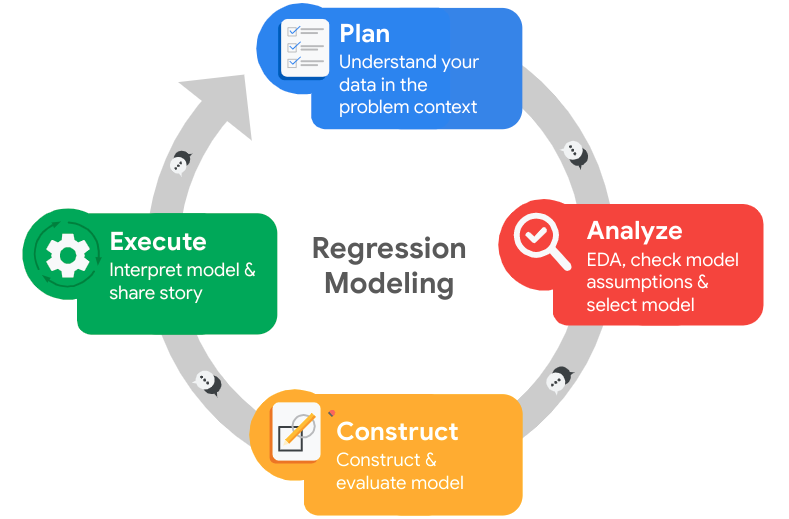



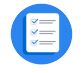

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
    - Salifort Motors HR team
- What are you trying to solve or accomplish?
    - to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
    - They also want to know what make employees leave.
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. leave = 1, stayed = 0
2. False Negative and False Postive implications
    - False Negative: 
        - Predicting an employee will stay (0) when they actually leave (1). 
        - This means mistakenly identifying employees who are likely to quit as employees who will stay. False negatives are problematic because it results in missed opportunities to intervene and retain valuable employees. The company may lose talented individuals who could have been retained if their intention to leave was accurately predicted.

    - False Positive: 
        - Predicting an employee will leave (1) when they actually stay (0). 
        - This means mistakenly identifying employees who are likely to stay as employees who will leave. While false positives may result in some unnecessary interventions or actions to retain employees who are not at risk of leaving, it is generally considered less critical compared to false negatives. It is better to invest resources in retaining employees who are not at risk of leaving rather than losing valuable employees due to false negatives.
3. Considering the consequences of false negatives and false positives, it is generally more important to minimize false negatives in this scenario. It is crucial to identify employees who are likely to quit accurately so that appropriate measures can be taken to retain them.
4. Since we do not know about the specific cost to measure more importance between FN and FP, f-1 score could be best suited since it balances between precision and recall.
    - ROC curve (AUC-ROC) can also provide valuable insights into the models' performance.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [170]:
# Import packages
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [39]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(3)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [40]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [199]:
# Gather descriptive statistics about the data
df0.describe(include='all')


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [200]:
# Display all column names
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
list(df0.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

In [201]:
import re

# Rename columns as needed
def convert_to_snake_case(col_names):
    snake_case_names = []
    for name in col_names:
        name = re.sub(r'\s+|[^a-zA-Z0-9]', '_', name)
        # Convert to lowercase
        name = name.lower()
        snake_case_names.append(name)
    return snake_case_names

df0.columns = convert_to_snake_case(df0.columns)


# Display all column names after the update
list(df0.columns)


['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [202]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [230]:
# Check for duplicates
duplicates = df0.duplicated()
duplicates.sum()

3008

In [231]:
# Inspect some rows containing duplicates as needed
df0[duplicates].head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [272]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()
print(f"Original: {len(df0)} | Duplicated: {len(df0[duplicates])} | New: {len(df1)}")
# Display first few rows of new dataframe as needed
df1.head(3)


Original: 14999 | Duplicated: 3008 | New: 11991


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### Check outliers

Check for outliers in the data.

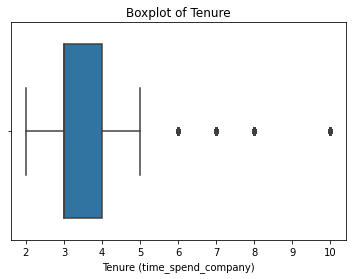

In [273]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df1['time_spend_company'])
plt.xlabel('Tenure (time_spend_company)')
plt.title('Boxplot of Tenure')
plt.show()

Above boxplot shows that there are outliers in time_spend_company (Tenure) and those are likely 6, 7, 8, and 10.

In [274]:
# Determine the number of rows containing outliers
# Calculate the lower and upper bounds for outliers
q1 = df1['time_spend_company'].quantile(0.25)
q3 = df1['time_spend_company'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify rows containing outliers
outliers = df1[(df1['time_spend_company'] < lower_bound) | (df1['time_spend_company'] > upper_bound)]

# Get the number of rows containing outliers
num_outliers = len(outliers)

print("Number of rows containing outliers:", num_outliers)


Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

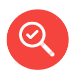
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)
    - Discovering: Checkout overall shape, size, content of the dataset
    - Joining: Add more data
    - Validating: Check if new data doesn't have mistakes or misspellings
    - Structuring: Structure data in different time periods and segments to understand trends
    - Validating
    - Cleaning: Check outliers, missing ata, and any data conversion needs
    - Validating
    - Presenting



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

### Discovering

In [275]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


1. target: left
2. Continuous numeric columns (satisfaction_level, last_evaluation, average_monthly_hours) can be converted to bins (10 or 20)
3. Categorical columns can be changed to one-hot-encoding

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

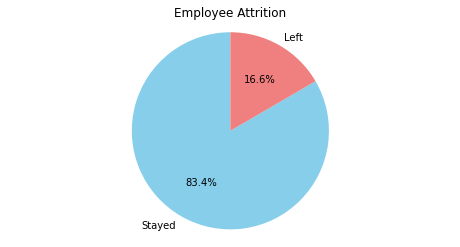

In [276]:
# Check Employee attrition
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df1' is the dataframe containing the data

# Count the number of employees who left and stayed
left_counts = df1['left'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(left_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Employee Attrition')
plt.show()

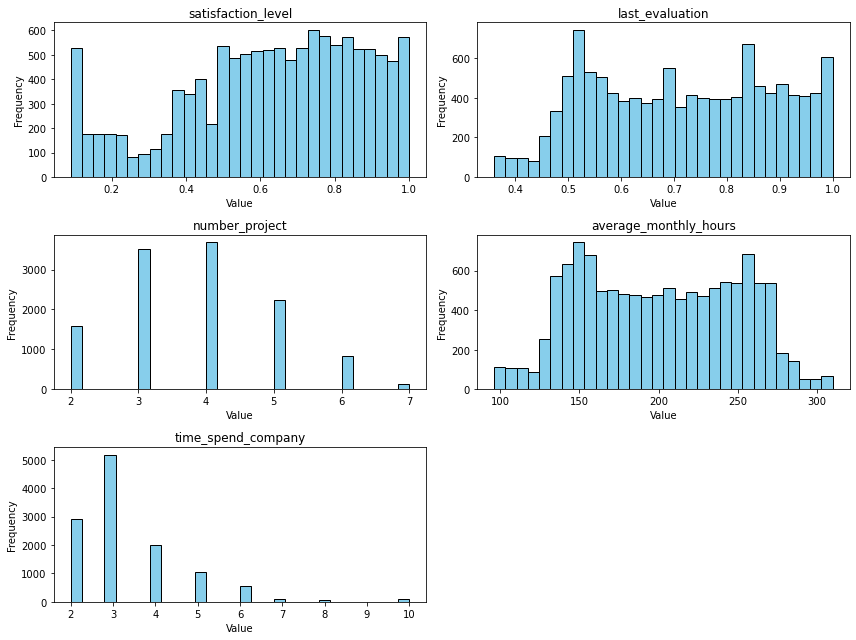

       satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  
count           11991.000000        11991.000000  
mean              200.473522            3.364857  
std                48.727813            1.330240  
min                96.000000            2.000000  
25%               157.000000            3.000000  
50%               200.000000            3.000000  
75%               243.000000            4.000000  
max               310.000000     

In [277]:
# Numeric Features: 
# Analyze the distribution and summary statistics of numeric features such as 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', and 'time_spend_company'. 
# Select the numeric features for analysis
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']

# Plot histograms for each numeric feature
plt.figure(figsize=(12, 9))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    plt.hist(df1[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats = df1[numeric_features].describe()
print(summary_stats)


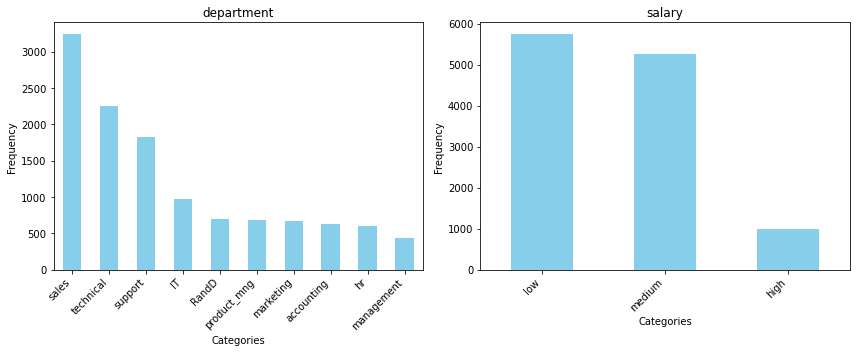

In [278]:
# Categorical Features: 
# Examine the distribution of categorical features such as 'department' and 'salary'. 
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df1' is the dataframe containing the data

# Select the categorical features for analysis
categorical_features = ['department', 'salary']

# Plot bar charts for each categorical feature
plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i+1)
    feature_counts = df1[feature].value_counts()
    feature_counts.plot(kind='bar', color='skyblue')
    plt.title(feature)
    plt.xlabel('Categories')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



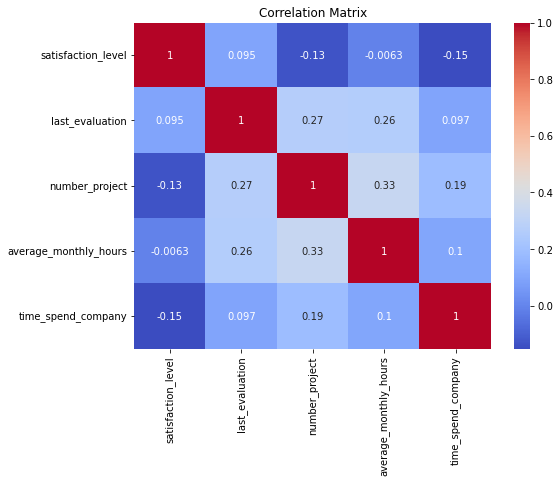

In [279]:
# Create a plot as needed
# Select the numeric features for correlation analysis
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']

# Calculate the correlation matrix
correlation_matrix = df1[numeric_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



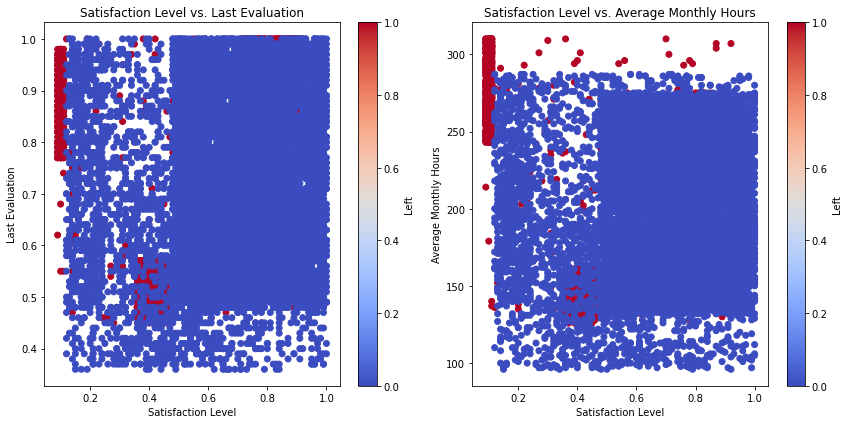

In [280]:
# Create a plot as needed
# 2 scatter plots to explore the potential interactions 
# between 'satisfaction_level' and 'last_evaluation', and
# between 'satisfaction_level' and 'average_montly_hours'.

# Create scatter plots to explore feature interactions
plt.figure(figsize=(12, 6))

# Scatter plot: satisfaction_level vs. last_evaluation
plt.subplot(1, 2, 1)
plt.scatter(df1['satisfaction_level'], df1['last_evaluation'], c=df1['left'], cmap='coolwarm')
plt.colorbar(label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Satisfaction Level vs. Last Evaluation')

# Scatter plot: satisfaction_level vs. average_montly_hours
plt.subplot(1, 2, 2)
plt.scatter(df1['satisfaction_level'], df1['average_monthly_hours'], c=df1['left'], cmap='coolwarm')
plt.colorbar(label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Satisfaction Level vs. Average Monthly Hours')

plt.tight_layout()
plt.show()



- 'Last Evaluation' vs. 'Satisfaction Level'
    - It shows that employess who are 'Highly Evaluated' and have 'Low Satisfaction Level' tended to leave.
- 'Average Monthly Hours' vs. 'Satisfaction Level'
    - It shows that employee who worked 'More' in average and have 'Low Satisfaction Level' tended to leave.

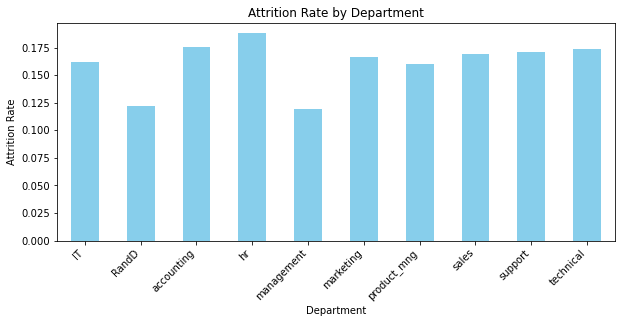

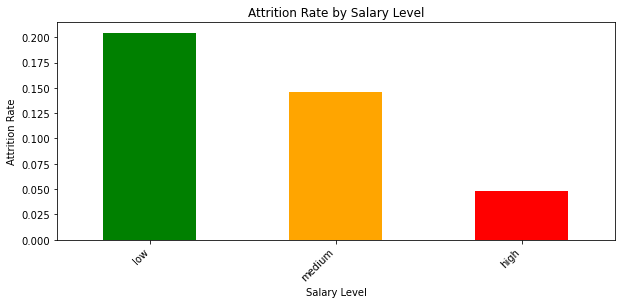

In [281]:
# Create a plot as needed
# Analyze attrition rate by department
attrition_by_department = df1.groupby('department')['left'].mean()

# Create a bar chart for attrition by department
plt.figure(figsize=(10, 4))
attrition_by_department.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Attrition Rate')
plt.show()

# Define the order of salary levels
salary_order = ['low', 'medium', 'high']

# Analyze attrition rate by salary level
attrition_by_salary = df1.groupby('salary')['left'].mean()

# Create a stacked bar chart for attrition by salary level with custom order
plt.figure(figsize=(10, 4))
attrition_by_salary.loc[salary_order].plot(kind='bar', stacked=True, color=['green', 'orange', 'red'])
plt.title('Attrition Rate by Salary Level')
plt.xlabel('Salary Level')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Attrition Rate')
plt.show()



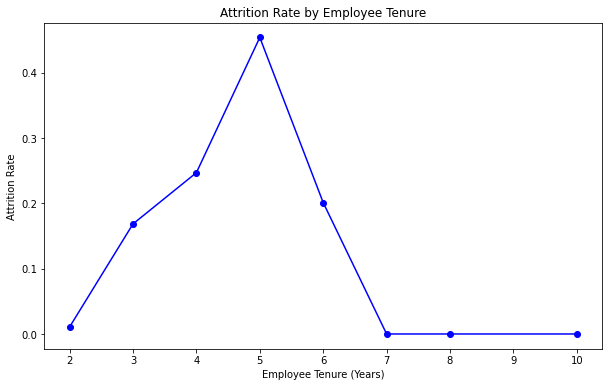

In [282]:
# Create a plot as needed
# Group the data by 'time_spend_company' and calculate attrition rate
attrition_by_tenure = df1.groupby('time_spend_company')['left'].mean()

# Create a line plot to analyze attrition rate over employee tenure
plt.figure(figsize=(10, 6))
attrition_by_tenure.plot(kind='line', marker='o', color='blue')
plt.title('Attrition Rate by Employee Tenure')
plt.xlabel('Employee Tenure (Years)')
plt.ylabel('Attrition Rate')
plt.show()



In [283]:
df2 = df1.copy()

### Structuring

#### Convert Numberic features into Bins

In [284]:
'''
def convert_numeric_to_bins(data, columns, num_bins_list, verbose=False):
    """
    Convert numeric features in a dataframe to integers assigned by bins.

    Parameters:
        data (DataFrame): The dataframe containing the data.
        columns (list): A list of column names to convert.
        num_bins_list (list): A list of the number of bins for each column.
        verbose (bool, optional): Whether to show the distribution of bins as subplots. Default is False.

    Returns:
        DataFrame: The updated dataframe with numeric features converted to integer bins.
    """
    updated_data = data.copy()

    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2
    num_cols = min(2, num_plots)

    if verbose:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
        axes = axes.flatten()

    for i, (column, num_bins) in enumerate(zip(columns, num_bins_list)):
        bin_column = column + '_bin'
        updated_data[bin_column] = pd.cut(updated_data[column], bins=num_bins, labels=False)
        
        if verbose:
            ax = axes[i]
            updated_data[bin_column].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
            ax.set_title(f'Distribution of {column} Bins')
            ax.set_xlabel(f'{column} Bins')
            ax.set_ylabel('Frequency')

    if verbose:
        # Remove any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust spacing between subplots
        fig.tight_layout()

        # Show the subplots
        plt.show()

    return updated_data
'''

'\ndef convert_numeric_to_bins(data, columns, num_bins_list, verbose=False):\n    """\n    Convert numeric features in a dataframe to integers assigned by bins.\n\n    Parameters:\n        data (DataFrame): The dataframe containing the data.\n        columns (list): A list of column names to convert.\n        num_bins_list (list): A list of the number of bins for each column.\n        verbose (bool, optional): Whether to show the distribution of bins as subplots. Default is False.\n\n    Returns:\n        DataFrame: The updated dataframe with numeric features converted to integer bins.\n    """\n    updated_data = data.copy()\n\n    num_plots = len(columns)\n    num_rows = (num_plots + 1) // 2\n    num_cols = min(2, num_plots)\n\n    if verbose:\n        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))\n        axes = axes.flatten()\n\n    for i, (column, num_bins) in enumerate(zip(columns, num_bins_list)):\n        bin_column = column + \'_bin\'\n        update

In [285]:
'''
# Specify the numeric columns and number of bins
numeric_columns = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
num_bins = [20, 20, 20]

df2 = convert_numeric_to_bins(df2, numeric_columns, num_bins, verbose=True)
df2.drop(numeric_columns, axis=1, inplace=True)
display(df2.head(3))
'''

"\n# Specify the numeric columns and number of bins\nnumeric_columns = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']\nnum_bins = [20, 20, 20]\n\ndf2 = convert_numeric_to_bins(df2, numeric_columns, num_bins, verbose=True)\ndf2.drop(numeric_columns, axis=1, inplace=True)\ndisplay(df2.head(3))\n"

#### Categorical Features

In [286]:
# Convert salary to [0, 1, 2]
mapping = {'low': 2, 'medium': 1, 'high': 0}
df2['salary'] = df2['salary'].map(mapping)

In [287]:
df2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,2
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,2
4,0.37,0.52,2,159,3,0,1,0,sales,2
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0
11996,0.74,0.95,5,266,10,0,0,1,management,0
11997,0.85,0.54,3,185,10,0,0,1,management,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0


In [288]:
# One-hot-encoding for other object categorical features
obj_columns = ['department']
df2 = pd.get_dummies(data = df2, columns = obj_columns)

In [289]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

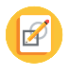
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It will be a binary classification problem tas.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [290]:
y = df2['left']
X = df2.drop('left', axis=1)

In [291]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [292]:
def evaulate_model(clf, x_data,  y_data, table = None, name = 'Random Forest'):
    # Perform cross-validation using cross_validate
    print(f"Running Evaluation for {name}")
    y_pred = clf.predict(x_data)
    # Get the mean scores for each metric
    acc = accuracy_score(y_data, y_pred)
    precision = precision_score(y_data, y_pred)
    recall = recall_score(y_data, y_pred)
    f1 = f1_score(y_data, y_pred)
    auc_roc = roc_auc_score(y_data, y_pred)

    # Print the mean scores
    print("-- Accuracy:", acc)
    print("-- Precision:", precision)
    print("-- Recall:", recall)
    print("-- F1 Score:", f1)
    print("-- AUC-ROC:", auc_roc)
    
    if table is None:
        # Create table of results.
        table = pd.DataFrame()
    table = table.append({'Model': name,
                          'Accuracy': acc,
                          'Precision': precision,
                          'Recall': recall,
                          'F1':  f1,
                          'AUC_ROC': auc_roc,
                          },
                            ignore_index=True
                        )
    return table

In [293]:
%%time
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()
model_name = 'Naive Bayes'
# Perform cross-validation using cross_val_score
cross_val_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='f1')
# Print the mean F1 score
print(f"{model_name}: Mean F1 score: {cross_val_scores.mean():.3f}")

# Fit the model on your training data.
nb.fit(X_train, y_train)
result_table = evaulate_model(nb, X_test, y_test, name=model_name)
result_table

Naive Bayes: Mean F1 score: 0.557
Running Evaluation for Naive Bayes
-- Accuracy: 0.8255503669112741
-- Precision: 0.4623338257016248
-- Recall: 0.663135593220339
-- F1 Score: 0.5448215839860747
-- AUC-ROC: 0.7595171236093777
CPU times: user 50 ms, sys: 0 ns, total: 50 ms
Wall time: 48.6 ms


,Model,Accuracy,Precision,Recall,F1,AUC_ROC
0,Naive Bayes,0.82555,0.462334,0.663136,0.544822,0.759517


In [294]:
%%time
# Define a model classifier
rf = RandomForestClassifier(random_state=0)
model_name = 'Random Forest'
# Perform cross-validation using cross_val_score
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
# Print the mean F1 score
print(f"Mean F1 score: {cross_val_scores.mean():.3f}")

rf.fit(X_train, y_train)
result_table = evaulate_model(rf, X_test, y_test, result_table, name=model_name)
result_table

Mean F1 score: 0.944
Running Evaluation for Random Forest
-- Accuracy: 0.985657104736491
-- Precision: 0.9820224719101124
-- Recall: 0.9258474576271186
-- F1 Score: 0.9531079607415486
-- AUC-ROC: 0.9613401975388165
CPU times: user 3.09 s, sys: 0 ns, total: 3.09 s
Wall time: 3.09 s


,Model,Accuracy,Precision,Recall,F1,AUC_ROC
0,Naive Bayes,0.825550,0.462334,0.663136,0.544822,0.759517
1,Random Forest,0.985657,0.982022,0.925847,0.953108,0.961340


In [295]:
%%time
# Define xgb to be your XGBClassifier.
xgb = XGBClassifier(random_state=0)
model_name = 'XGBoost'
# Perform cross-validation using cross_val_score
cross_val_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1')
# Print the mean F1 score
print(f"Mean F1 score: {cross_val_scores.mean():.3f}")

xgb.fit(X_train, y_train)
result_table = evaulate_model(xgb, X_test, y_test, result_table, name=model_name)
result_table

Mean F1 score: 0.942
Running Evaluation for XGBoost
-- Accuracy: 0.9853235490326885
-- Precision: 0.9734513274336283
-- Recall: 0.9322033898305084
-- F1 Score: 0.9523809523809523
-- AUC-ROC: 0.9637263980031401
CPU times: user 7.04 s, sys: 0 ns, total: 7.04 s
Wall time: 3.55 s


,Model,Accuracy,Precision,Recall,F1,AUC_ROC
0,Naive Bayes,0.825550,0.462334,0.663136,0.544822,0.759517
1,Random Forest,0.985657,0.982022,0.925847,0.953108,0.961340
2,XGBoost,0.985324,0.973451,0.932203,0.952381,0.963726


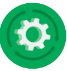
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
- Both Random Forest and XGBoost performed well on this problem resulting about 0.96 of AUC_ROC score and 0.95 of f1-score
- In detail, Random Forest was better in reducing False Positive and XGBoost was better in reducing False Negative.
- 5 Common important features of two models are
    - satisfaction_level
    - number_project
    - average_monthly_hours
    - time_spend_company
    - last evaluation

In [300]:
result_table

,Model,Accuracy,Precision,Recall,F1,AUC_ROC
0,Naive Bayes,0.825550,0.462334,0.663136,0.544822,0.759517
1,Random Forest,0.985657,0.982022,0.925847,0.953108,0.961340
2,XGBoost,0.985324,0.973451,0.932203,0.952381,0.963726


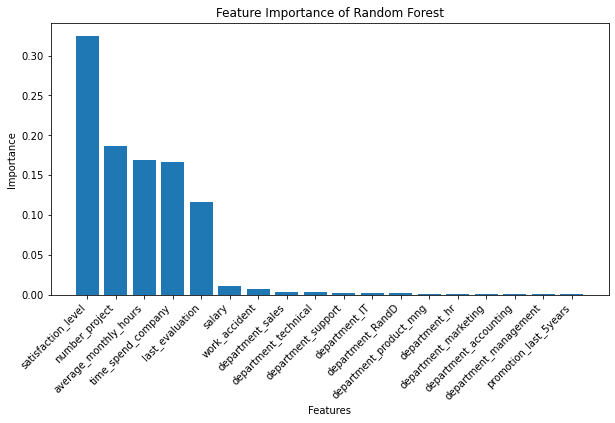

In [298]:
# Get the feature importances from the trained model
importances = rf.feature_importances_
feature_names = X_train.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Plot the feature importances in a bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest')
plt.show()

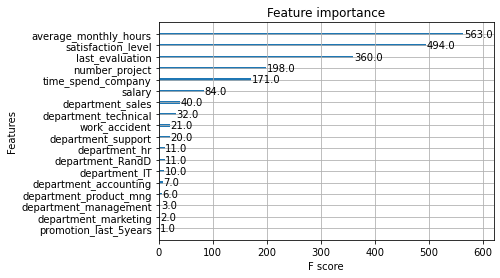

In [299]:
plot_importance(xgb)

### Conclusion, Recommendations, Next Steps
- Since we have relatively low recall score, we can try other ways such adding more features and modifying features.
- We have simliar or improve f-1 score when we predict with the test data compared to the cross validation score meaning that there would be less overfitting.